In [434]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors

import matplotlib.pyplot as plt

%matplotlib inline

digits = load_digits()

print(dir(digits))

['DESCR', 'data', 'images', 'target', 'target_names']


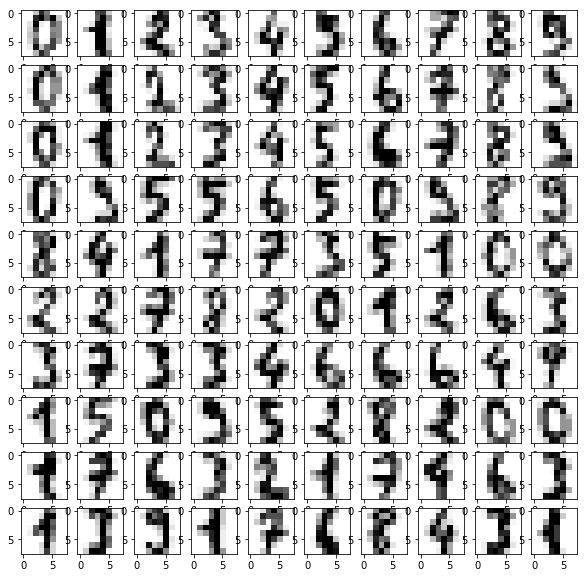

In [435]:
c = 10
r = 10
plt.figure(figsize=(10,10))

for i in range(c):
    for j in range(r):
        plt.subplot(c,r,i * r + j + 1)
        plt.imshow(digits['images'][i * r + j], cmap="Greys")

In [436]:
def eval_clf_list(clf_list, X_test, y_test):
    for clf_name in clf_list:
        clf = clf_list[clf_name]
        pred = clf.predict(X_test)
        acc = accuracy_score(pred, y_test)
        print("Accuracy for the {} classifier: {}".format(clf_name, acc))

In [437]:
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], test_size=0.33)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

clf_list = {}

(1203, 64) (594, 64)
(1203,) (594,)


In [438]:
clf = naive_bayes.GaussianNB()
clf.fit(X_train, y_train)
clf_list['GaussianNB'] = clf

In [439]:
clf = svm.SVC(C=1, kernel="poly", degree=3)
clf.fit(X_train, y_train)
clf_list['SVC with poly kernel'] = clf

In [440]:
clf = svm.SVC(C=1, kernel="linear")
clf.fit(X_train, y_train)
clf_list['SVC with linear kernel'] = clf

In [441]:
clf = tree.DecisionTreeClassifier(max_depth=12)
clf.fit(X_train, y_train)
clf_list['DecisionTreeClassifier'] = clf

In [442]:
clf = ensemble.RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
clf_list['RandomForestClassifier'] = clf

In [443]:
clf = ensemble.AdaBoostClassifier(learning_rate = 0.1)
clf.fit(X_train, y_train)
clf_list['AdaBoostClassifier'] = clf

In [444]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
clf_list['KNeighborsClassifier'] = clf

In [445]:
eval_clf_list(clf_list, X_test, y_test)

Accuracy for the KNeighborsClassifier classifier: 0.9781144781144782
Accuracy for the RandomForestClassifier classifier: 0.9781144781144782
Accuracy for the DecisionTreeClassifier classifier: 0.8703703703703703
Accuracy for the AdaBoostClassifier classifier: 0.6750841750841751
Accuracy for the SVC with linear kernel classifier: 0.9747474747474747
Accuracy for the GaussianNB classifier: 0.8484848484848485
Accuracy for the SVC with poly kernel classifier: 0.9848484848484849
